In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm

In [98]:
teis_df = pd.read_csv('C:/Users/Evan/Desktop/NSS/Python/projects/teis-project-bently/data/teis.csv', dtype = {"Child ID" : object, "Cognitive T-Score" : object})

In [100]:
teis_df.head()

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Code 1,Code 2,Code 3,Code 4,Code 5,Code 6,Code 7,Code 8,Code 9,Code 10
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16.0,77-97,39/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21.0,82-96,79/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25.0,81-101,77/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84.0,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5.0,68-88,1990-09-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
teis_df['Program Label'].value_counts()

BDI-3 Eligibility Evaluation          12403
BDI-3 Annual Evaluation               11205
BDI-3 Milestone or Exit Evaluation      339
Name: Program Label, dtype: int64

In [122]:
teis_df=teis_df.drop(columns=['Code 1', 'Code 2', 'Code 3', 'Code 4', 'Code 5', 'Code 6', 'Code 7', 'Code 8', 'Code 9', 'Code 10'])

In [129]:
teis_df.head()

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16.0,77-97,39/90,...,9.0,13.0,84.0,12,98/90,411.0,392 - 431,1,60.0,71
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21.0,82-96,79/90,...,11.0,7.0,16.0,18,29/90,437.0,421 - 453, 1.00,40.0,29
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25.0,81-101,77/90,...,10.0,7.0,16.0,15,37/90,426.0,408 - 444, 1.00,40.0,29
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84.0,103-123,99/90,...,9.0,10.0,50.0,12,92/90,411.0,392 - 431,0,50.0,50
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5.0,68-88,1990-09-01 00:00:00,...,10.0,10.0,50.0,15,88/90,426.0,408 - 444,0,50.0,50


In [128]:
teis_df['Date of Birth']=pd.to_datetime(teis_df['Date of Birth'])

In [136]:
teis_adaptive_sub=teis_df[['Adaptive-Self Care SS', 'Adaptive-Personal Responsibility SS']]
null_score_adp=teis_adaptive_sub.loc[teis_adaptive_sub['Adaptive-Personal Responsibility SS'].isnull()==True]

In [137]:
score_adp=teis_adaptive_sub.loc[teis_adaptive_sub['Adaptive-Personal Responsibility SS'].isnull()==False]

In [142]:
null_score_adp['Adaptive-Self Care SS'].describe()

count    9797.000000
mean        8.130142
std         3.279187
min         1.000000
25%         6.000000
50%         8.000000
75%        11.000000
max        19.000000
Name: Adaptive-Self Care SS, dtype: float64

In [143]:
null_score_adp['Adaptive-Personal Responsibility SS'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Adaptive-Personal Responsibility SS, dtype: float64

In [140]:
score_adp['Adaptive-Personal Responsibility SS'].describe()

count    9698.000000
mean        7.957826
std         3.861019
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        19.000000
Name: Adaptive-Personal Responsibility SS, dtype: float64

In [141]:
score_adp['Adaptive-Self Care SS'].describe()

count    9697.000000
mean        6.770548
std         2.842766
min         1.000000
25%         5.000000
50%         7.000000
75%         8.000000
max        19.000000
Name: Adaptive-Self Care SS, dtype: float64

<AxesSubplot:>

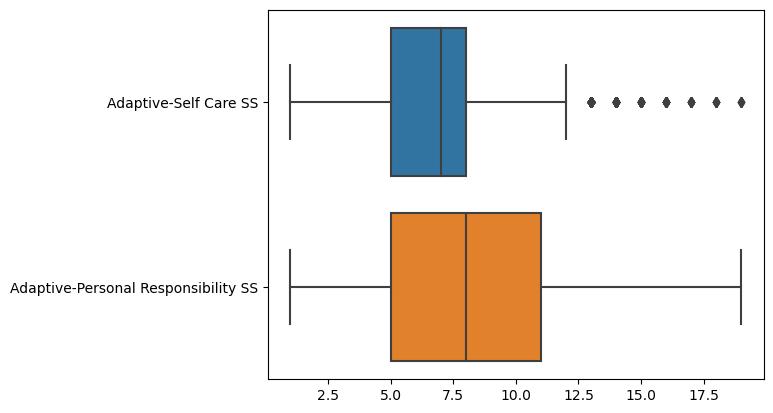

In [153]:
sns.boxplot(data=score_adp, orient='h')

<AxesSubplot:xlabel='Adaptive-Self Care SS'>

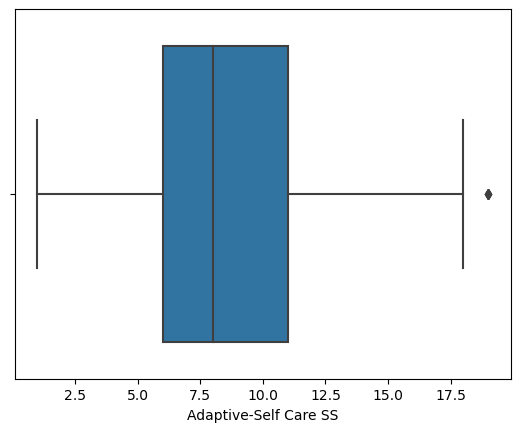

In [152]:
sns.boxplot(data=null_score_adp, x='Adaptive-Self Care SS', legend=)

In [139]:
score_adp.corr(method='pearson')

,Adaptive-Self Care SS,Adaptive-Personal Responsibility SS
Adaptive-Self Care SS,1.000000,0.566104
Adaptive-Personal Responsibility SS,0.566104,1.000000


In [113]:
teis_comm_sub=teis_df[['Communication-Receptive Communication SS', 'Communication-Expressive Communication SS']]

In [108]:
teis_df.loc[teis_df.duplicated()==True]

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Code 1,Code 2,Code 3,Code 4,Code 5,Code 6,Code 7,Code 8,Code 9,Code 10


In [107]:
teis_df=teis_df.drop_duplicates(keep='first')

In [ ]:
teis_df

In [73]:
teis_child_dup=teis_df['Child ID'].value_counts().reset_index()

In [76]:
teis_child_dup.columns=['Child ID', 'Dup Num']

In [77]:
teis_child_dup

,Child ID,Dup Num
0,533717,6
1,533951,6
2,493259,5
3,562963,5
4,523644,4
...,...,...
18998,551309,1
18999,551311,1
19000,551312,1
19001,551313,1


In [83]:
teis_df=teis_df.merge(teis_child_dup, how='left', on='Child ID')

In [85]:
duplicates = teis_df.loc[teis_df['Dup Num']>1]

In [86]:
duplicates['Adaptive Percentile Rank'].describe()

count     9683
unique      36
top          1
freq       790
Name: Adaptive Percentile Rank, dtype: object

In [69]:
teis_df['duplicate_ct']=1

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE,cpc_css_90_lower,cpc_css_90_upper,duplicate_ct
0,44879,F,9/27/2022,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,12,98/90,411.0,392 - 431,1,60.0,71,392,431,1
1,47795,F,12/23/2020,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,18,29/90,437.0,421 - 453,– 1.00,40.0,29,421,453,1
2,54340,M,6/22/2021,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,15,37/90,426.0,408 - 444,– 1.00,40.0,29,408,444,1
3,54344,F,3/7/2022,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,12,92/90,411.0,392 - 431,0,50.0,50,392,431,1
4,54515,M,11/4/2021,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,9/90,...,15,88/90,426.0,408 - 444,0,50.0,50,408,444,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23942,SP03287,F,9/25/2023,Memphis Delta,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,6,>99/90,378.0,365 - 391,1.67,67.0,85,365,391,1
23943,SP03288,F,5/18/2021,South Central,BDI-3 Eligibility Evaluation,25.0,115.0,84,107-121,96/90,...,37,99/90,499.0,491 - 508,1.33,63.0,78,491,508,1
23944,SP03289,F,10/31/2021,South Central,BDI-3 Eligibility Evaluation,21.0,103.0,58,96-110,92/90,...,25,89/90,464.0,450 - 479,0,50.0,50,450,479,1
23945,SP03290,M,3/25/2020,Memphis Delta,BDI-3 Annual Evaluation,16.0,88.0,21,82-96,66/90,...,40,75/90,507.0,500 - 515,– 0.33,47.0,43,500,515,1


In [82]:
teis_df.loc[teis_df['Child ID']==533717]

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE,cpc_css_90_lower,cpc_css_90_upper,duplicate_ct
8381,533717,M,8/24/2020,First Tennessee,BDI-3 Annual Evaluation,25.0,115.0,84,107-121,96/90,...,32,82/90,487.0,476 - 497,– 0.33,47.0,43,476,497,1
8382,533717,M,8/24/2020,First Tennessee,BDI-3 Annual Evaluation,26.0,118.0,88,110-124,97/90,...,25,27/90,464.0,450 - 479,– 1.00,40.0,29,450,479,1
8383,533717,M,8/24/2020,First Tennessee,BDI-3 Annual Evaluation,26.0,118.0,88,110-124,97/90,...,25,27/90,464.0,450 - 479,– 1.00,40.0,29,450,479,1
8384,533717,M,8/24/2020,First Tennessee,BDI-3 Annual Evaluation,25.0,115.0,84,107-121,96/90,...,32,82/90,487.0,476 - 497,– 0.33,47.0,43,476,497,1
8385,533717,M,8/24/2020,First Tennessee,BDI-3 Annual Evaluation,26.0,118.0,88,110-124,97/90,...,25,27/90,464.0,450 - 479,– 1.00,40.0,29,450,479,1
8386,533717,M,8/24/2020,First Tennessee,BDI-3 Annual Evaluation,26.0,118.0,88,110-124,97/90,...,25,27/90,464.0,450 - 479,– 1.00,40.0,29,450,479,1


In [18]:
for i in teis_df:
    teis_df['Adaptive RDI']=teis_df['Adaptive RDI'].str.replace('Jan-', '1/')
    teis_df['Adaptive RDI']=teis_df['Adaptive RDI'].str.replace('Feb-', '2/')
    teis_df['Adaptive RDI']=teis_df['Adaptive RDI'].str.replace('Mar-', '3/')
    teis_df['Adaptive RDI']=teis_df['Adaptive RDI'].str.replace('Apr-', '4/')
    teis_df['Adaptive RDI']=teis_df['Adaptive RDI'].str.replace('May-', '5/')
    teis_df['Adaptive RDI']=teis_df['Adaptive RDI'].str.replace('Jun-', '6/')
    teis_df['Adaptive RDI']=teis_df['Adaptive RDI'].str.replace('Jul-', '7/')
    teis_df['Adaptive RDI']=teis_df['Adaptive RDI'].str.replace('Aug-', '8/')
    teis_df['Adaptive RDI']=teis_df['Adaptive RDI'].str.replace('Sep-', '9/')
    teis_df['Adaptive RDI']=teis_df['Adaptive RDI'].str.replace('Oct-', '10/')
    teis_df['Adaptive RDI']=teis_df['Adaptive RDI'].str.replace('Nov-', '11/')
    teis_df['Adaptive RDI']=teis_df['Adaptive RDI'].str.replace('Dec-', '12/')

In [59]:
for i in teis_df:
    teis_df['Cognitive-Perception and Concepts RDI']=teis_df['Cognitive-Perception and Concepts RDI'].str.replace('Jan-', '1/')
    teis_df['Cognitive-Perception and Concepts RDI']=teis_df['Cognitive-Perception and Concepts RDI'].str.replace('Feb-', '2/')
    teis_df['Cognitive-Perception and Concepts RDI']=teis_df['Cognitive-Perception and Concepts RDI'].str.replace('Mar-', '3/')
    teis_df['Cognitive-Perception and Concepts RDI']=teis_df['Cognitive-Perception and Concepts RDI'].str.replace('Apr-', '4/')
    teis_df['Cognitive-Perception and Concepts RDI']=teis_df['Cognitive-Perception and Concepts RDI'].str.replace('May-', '5/')
    teis_df['Cognitive-Perception and Concepts RDI']=teis_df['Cognitive-Perception and Concepts RDI'].str.replace('Jun-', '6/')
    teis_df['Cognitive-Perception and Concepts RDI']=teis_df['Cognitive-Perception and Concepts RDI'].str.replace('Jul-', '7/')
    teis_df['Cognitive-Perception and Concepts RDI']=teis_df['Cognitive-Perception and Concepts RDI'].str.replace('Aug-', '8/')
    teis_df['Cognitive-Perception and Concepts RDI']=teis_df['Cognitive-Perception and Concepts RDI'].str.replace('Sep-', '9/')
    teis_df['Cognitive-Perception and Concepts RDI']=teis_df['Cognitive-Perception and Concepts RDI'].str.replace('Oct-', '10/')
    teis_df['Cognitive-Perception and Concepts RDI']=teis_df['Cognitive-Perception and Concepts RDI'].str.replace('Nov-', '11/')
    teis_df['Cognitive-Perception and Concepts RDI']=teis_df['Cognitive-Perception and Concepts RDI'].str.replace('Dec-', '12/')

In [60]:
teis_df.loc[teis_df['Cognitive-Perception and Concepts RDI']=='1/90']

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE,cpc_css_90_lower,cpc_css_90_upper
17,56324,F,4/8/2022,Southeast Tennessee,BDI-3 Eligibility Evaluation,9.0,95.0,37,86-106,82/90,...,1,6,1/90,378.0,365 - 391,– 2.33,27.0,1,365,391
24,474074,F,11/14/2019,Greater Nashville,BDI-3 Annual Evaluation,21.0,103.0,58,96-110,88/90,...,2,25,1/90,464.0,450 - 479,– 2.00,30.0,8,450,479
25,474074,F,11/14/2019,Greater Nashville,BDI-3 Annual Evaluation,21.0,103.0,58,96-110,88/90,...,2,25,1/90,464.0,450 - 479,– 2.00,30.0,8,450,479
31,474967,F,11/26/2019,South Central,BDI-3 Annual Evaluation,11.0,73.0,4,68-82,37/90,...,1,22,1/90,451.0,429 - 473,– 2.33,27.0,1,429,473
32,474967,F,11/26/2019,South Central,BDI-3 Annual Evaluation,11.0,73.0,4,68-82,37/90,...,1,22,1/90,451.0,429 - 473,– 2.33,27.0,1,429,473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23830,SP03175,F,5/25/2021,East Tennessee,BDI-3 Eligibility Evaluation,9.0,67.0,1,62-76,21/90,...,2,12,1/90,411.0,392 - 431,– 2.00,30.0,8,392,431
23858,SP03203,M,6/5/2021,East Tennessee,BDI-3 Eligibility Evaluation,18.0,94.0,34,87-101,79/90,...,2,12,1/90,411.0,392 - 431,– 2.00,30.0,8,392,431
23896,SP03241,M,11/17/2021,East Tennessee,BDI-3 Eligibility Evaluation,4.0,70.0,2,64-84,5/90,...,2,8,1/90,395.0,376 - 415,– 2.00,30.0,8,376,415
23918,SP03263,F,6/1/2021,Upper Cumberland,BDI-3 Eligibility Evaluation,11.0,73.0,4,68-82,34/90,...,2,12,1/90,411.0,392 - 431,– 2.00,30.0,8,392,431


In [44]:
for i in teis_df:
    teis_df['cpc_css_90_lower']=teis_df['Cognitive-Perception and Concepts CSS 90%'].str[0:3]
    teis_df['cpc_css_90_upper']=teis_df['Cognitive-Perception and Concepts CSS 90%'].str[6:9]

In [47]:
print(teis_df['cpc_css_90_lower'][0])
print(teis_df['cpc_css_90_upper'][0])

392
431


In [14]:
teis_df['Cognitive-Perception and Concepts SS'].describe()

count    23927.000000
mean         7.619133
std          3.284079
min          1.000000
25%          6.000000
50%          8.000000
75%         10.000000
max         19.000000
Name: Cognitive-Perception and Concepts SS, dtype: float64

In [47]:
for row in teis_df:
    teis_df['cognitive_soss'] = (teis_df['Cognitive-Perception and Concepts SS']+teis_df['Cognitive-Reasoning / Academic Skills SS']+teis_df['Cognitive-Attention and Memory SS'])
    teis_df['adaptive_soss'] = (teis_df['Adaptive-Self Care SS']+teis_df['Adaptive-Personal Responsibility SS'])
    teis_df['soc_emo_soss'] = (teis_df['Social Emotional-Adult Interaction SS']+teis_df['Social Emotional-Peer Interaction SS']+teis_df['Social Emotional-Self Concept / Social Role SS'])
    teis_df['communicate_soss'] = (teis_df['Communication-Receptive Communication SS']+teis_df['Communication-Expressive Communication SS'])
    teis_df['motor_soss'] = (teis_df['Motor-Gross Motor SS']+teis_df['Motor-Fine Motor SS']+teis_df['Motor-Perceptual Motor SS'])
    teis_df['soss_total'] = (teis_df.motor_soss+teis_df.communicate_soss+teis_df.soc_emo_soss+teis_df.adaptive_soss+teis_df.cognitive_soss)

In [49]:
cog_soss=teis_df[['cognitive_soss']].value_counts().reset_index()
adaptive_soss=teis_df[['adaptive_soss']].value_counts().reset_index()
soc_emo_soss=teis_df[['soc_emo_soss']].value_counts().reset_index()
comms_soss=teis_df[['communicate_soss']].value_counts().reset_index()
motor_soss=teis_df[['motor_soss']].value_counts().reset_index()
soss_total=teis_df[['soss_total']].value_counts().reset_index()

In [50]:
cog_soss.columns = ['Cognitive_SoSS', 'Count']
adaptive_soss.columns = ['Adaptive_SoSS', 'Count']
soc_emo_soss.columns = ['Soc_emo_SoSS', 'Count']
comms_soss.columns = ['Comm_SoSS', 'Count']
motor_soss.columns = ['Motor_SoSS', 'Count']
soss_total.columns = ['SoSS_total', 'Count']

In [53]:
cog_soss.Cognitive_SoSS.describe()

count    49.000000
mean     27.204082
std      14.624437
min       3.000000
25%      15.000000
50%      27.000000
75%      39.000000
max      54.000000
Name: Cognitive_SoSS, dtype: float64

<BarContainer object of 49 artists>

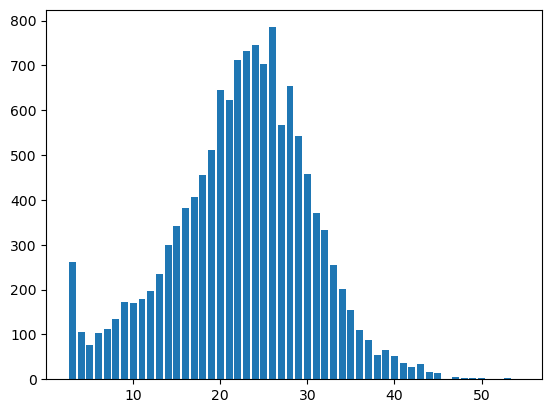

In [39]:
plt.bar(cog_soss['Cognitive_SoSS'], cog_soss['Count'])

In [54]:
adaptive_soss.Adaptive_SoSS.describe()

count    35.000000
mean     19.000000
std      10.246951
min       2.000000
25%      10.500000
50%      19.000000
75%      27.500000
max      36.000000
Name: Adaptive_SoSS, dtype: float64

<BarContainer object of 35 artists>

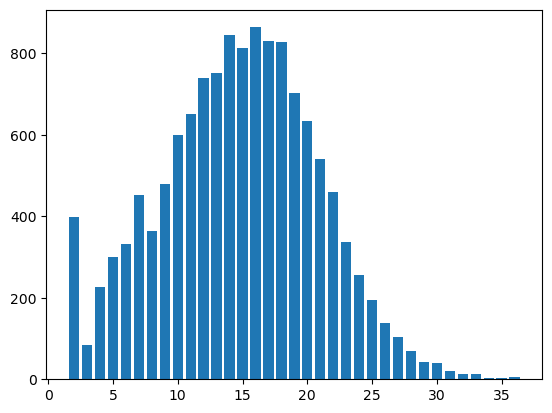

In [43]:
plt.bar(adaptive_soss['Adaptive_SoSS'], adaptive_soss['Count'])

In [55]:
soc_emo_soss.Soc_emo_SoSS.describe()

count    50.000000
mean     27.520000
std      14.612324
min       3.000000
25%      15.250000
50%      27.500000
75%      39.750000
max      53.000000
Name: Soc_emo_SoSS, dtype: float64

<BarContainer object of 50 artists>

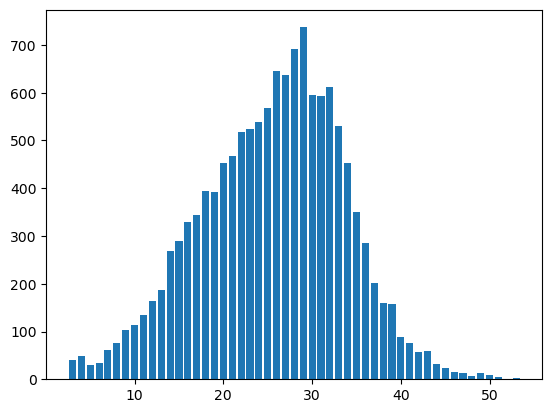

In [44]:
plt.bar(soc_emo_soss['Soc_emo_SoSS'], soc_emo_soss['Count'])

In [56]:
comms_soss.Comm_SoSS.describe()

count    37.000000
mean     20.000000
std      10.824355
min       2.000000
25%      11.000000
50%      20.000000
75%      29.000000
max      38.000000
Name: Comm_SoSS, dtype: float64

<BarContainer object of 37 artists>

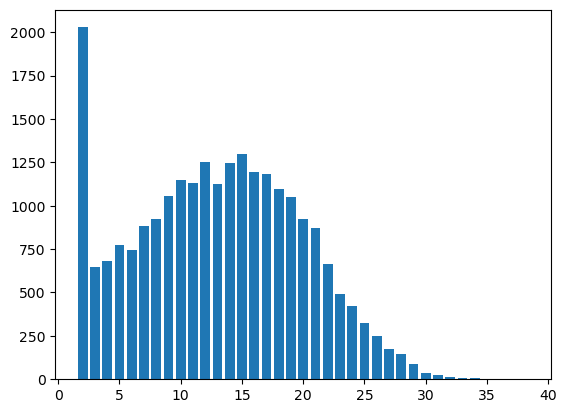

In [45]:
plt.bar(comms_soss['Comm_SoSS'], comms_soss['Count'])

(array([3357., 1517., 2864., 2279., 2372., 3741., 2280., 2843., 1158.,
         748.,  569.,  126.,   44.,    9.,    5.]),
 array([ 2. ,  4.4,  6.8,  9.2, 11.6, 14. , 16.4, 18.8, 21.2, 23.6, 26. ,
        28.4, 30.8, 33.2, 35.6, 38. ]),
 <BarContainer object of 15 artists>)

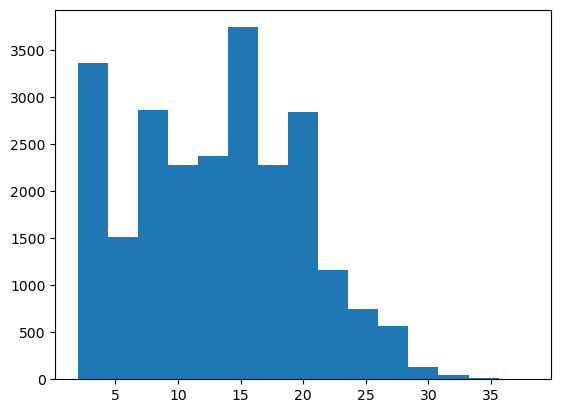

In [137]:
plt.hist(teis_df.communicate_soss, bins=15)

<BarContainer object of 48 artists>

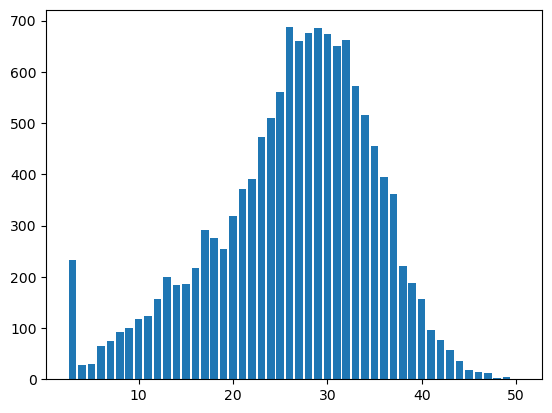

In [46]:
plt.bar(motor_soss['Motor_SoSS'], motor_soss['Count'])

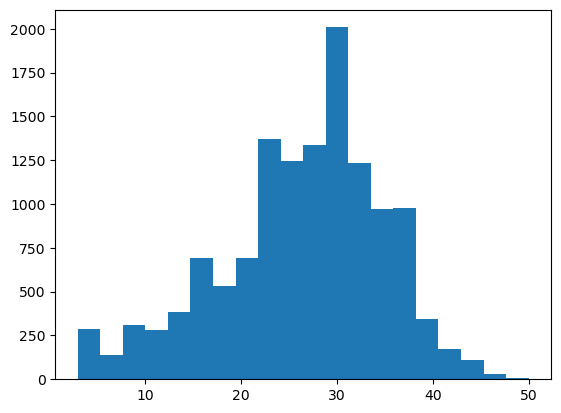

In [131]:
plt.hist(teis_df['motor_soss'], bins=20)
plt.show()

In [58]:
soss_total.SoSS_total.describe()

count    183.000000
mean     104.071038
std       53.094156
min       13.000000
25%       58.500000
50%      104.000000
75%      149.500000
max      199.000000
Name: SoSS_total, dtype: float64

In [96]:
soss_total.SoSS_total.median()

104.0

In [135]:
bool_series = pd.notnull(teis_df['communicate_soss'])
soss_total_ar = teis_df[bool_series]
soss_array=soss_total_ar['soss_total'].to_numpy()

In [133]:
soss_array

array([128., 118., 133., ..., 166., 118., 107.])

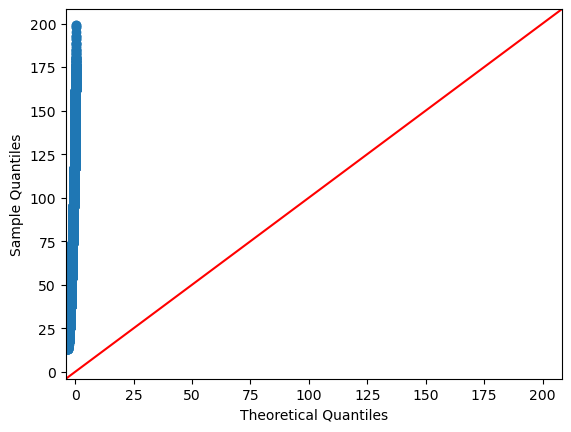

In [136]:
fig = sm.qqplot(soss_array, line='45')
plt.show()

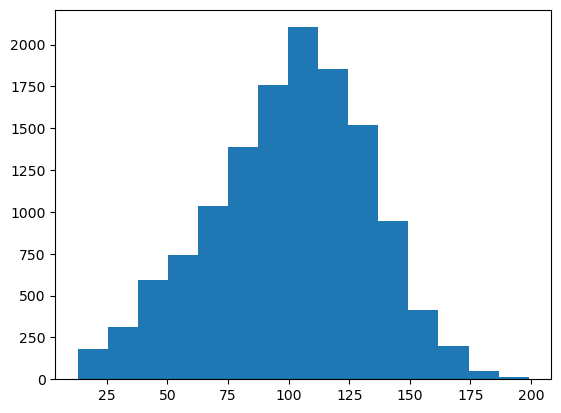

In [126]:
plt.hist(soss_array, bins=15)
plt.show()

In [121]:
np.random.seed(0)
data = np.random.normal(0,1, 1000)

array([ 1.76405235e+00,  4.00157208e-01,  9.78737984e-01,  2.24089320e+00,
        1.86755799e+00, -9.77277880e-01,  9.50088418e-01, -1.51357208e-01,
       -1.03218852e-01,  4.10598502e-01,  1.44043571e-01,  1.45427351e+00,
        7.61037725e-01,  1.21675016e-01,  4.43863233e-01,  3.33674327e-01,
        1.49407907e+00, -2.05158264e-01,  3.13067702e-01, -8.54095739e-01,
       -2.55298982e+00,  6.53618595e-01,  8.64436199e-01, -7.42165020e-01,
        2.26975462e+00, -1.45436567e+00,  4.57585173e-02, -1.87183850e-01,
        1.53277921e+00,  1.46935877e+00,  1.54947426e-01,  3.78162520e-01,
       -8.87785748e-01, -1.98079647e+00, -3.47912149e-01,  1.56348969e-01,
        1.23029068e+00,  1.20237985e+00, -3.87326817e-01, -3.02302751e-01,
       -1.04855297e+00, -1.42001794e+00, -1.70627019e+00,  1.95077540e+00,
       -5.09652182e-01, -4.38074302e-01, -1.25279536e+00,  7.77490356e-01,
       -1.61389785e+00, -2.12740280e-01, -8.95466561e-01,  3.86902498e-01,
       -5.10805138e-01, -

<BarContainer object of 183 artists>

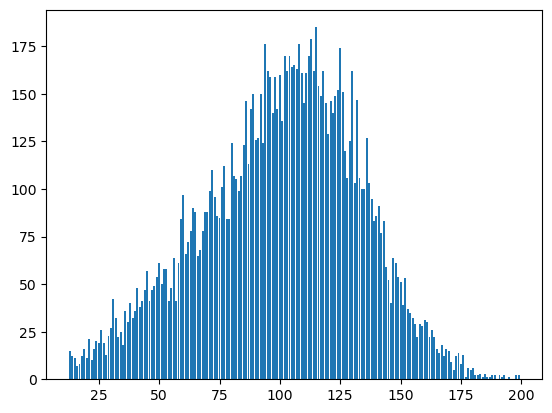

In [52]:
plt.bar(soss_total['SoSS_total'], soss_total['Count'])

In [89]:
percentile_cog=teis_df['Cognitive Percentile Rank'].value_counts().reset_index()

In [91]:
percentile_cog.columns = ['Percentile', 'Count']
percentile_cog.Percentile=percentile_cog.Percentile.str.replace('<', '')
percentile_cog.Percentile=percentile_cog.Percentile.str.replace('>', '')

,Percentile,Count
0,25,1561
1,50,1324
2,9,1230
3,42,1059
4,2,962
5,1,912
6,32,890
7,30,785
8,19,766
9,21,746


In [93]:
percentile_cog.Percentile=percentile_cog.Percentile.astype(float)

<BarContainer object of 52 artists>

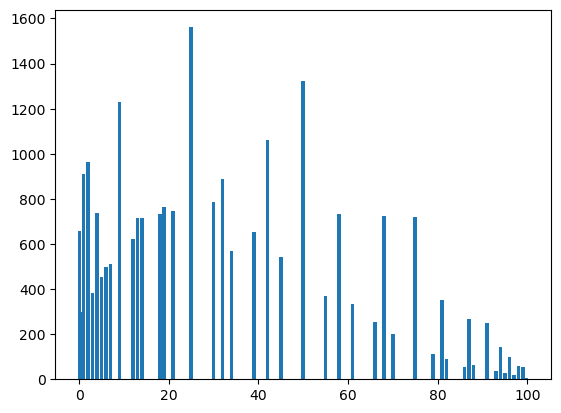

In [94]:
plt.bar(percentile_cog.Percentile, percentile_cog.Count)


In [138]:
elig_only = teis_df.loc[teis_df['Program Label']=='BDI-3 Eligibility Evaluation']
elig_only

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE,cognitive_soss,adaptive_soss,soc_emo_soss,communicate_soss,motor_soss,soss_total
0,44879,F,9/27/2022,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,392 - 431,1,60.0,71,NaN,NaN,NaN,17.0,NaN,NaN
1,47795,F,12/23/2020,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,421 - 453,– 1.00,40.0,29,30.0,16.0,32.0,19.0,31.0,128.0
2,54340,M,6/22/2021,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,408 - 444,– 1.00,40.0,29,NaN,NaN,NaN,14.0,NaN,NaN
3,54344,F,3/7/2022,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,392 - 431,0,50.0,50,NaN,NaN,NaN,16.0,NaN,NaN
4,54515,M,11/4/2021,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,Sep-90,...,408 - 444,0,50.0,50,NaN,NaN,NaN,10.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23941,SP03286,F,8/16/2021,Memphis Delta,BDI-3 Eligibility Evaluation,30.0,130.0,98,121-135,99/90,...,476 - 497,1,60.0,71,35.0,30.0,28.0,17.0,38.0,148.0
23942,SP03287,F,9/25/2023,Memphis Delta,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,365 - 391,1.67,67.0,85,NaN,NaN,NaN,24.0,NaN,NaN
23943,SP03288,F,5/18/2021,South Central,BDI-3 Eligibility Evaluation,25.0,115.0,84,107-121,96/90,...,491 - 508,1.33,63.0,78,41.0,25.0,38.0,24.0,38.0,166.0
23944,SP03289,F,10/31/2021,South Central,BDI-3 Eligibility Evaluation,21.0,103.0,58,96-110,92/90,...,450 - 479,0,50.0,50,29.0,21.0,31.0,5.0,32.0,118.0


In [139]:
elig_only['Adaptive Sum of Scaled Scores'].describe()

count    12397.000000
mean        10.574252
std          5.259565
min          1.000000
25%          7.000000
50%         10.000000
75%         13.000000
max         36.000000
Name: Adaptive Sum of Scaled Scores, dtype: float64

In [140]:
elig_only['Social-Emotional Sum of Scaled Scores'].describe()

count    12395.000000
mean        21.370553
std          6.989925
min          2.000000
25%         17.000000
50%         21.000000
75%         26.000000
max         48.000000
Name: Social-Emotional Sum of Scaled Scores, dtype: float64

In [141]:
elig_only['Communication Sum of Scaled Scores'].describe()

count    12382.000000
mean        13.727185
std          6.419838
min          2.000000
25%          9.000000
50%         14.000000
75%         19.000000
max         36.000000
Name: Communication Sum of Scaled Scores, dtype: float64

In [142]:
elig_only['Motor Sum of Scaled Scores'].describe()

count    12387.000000
mean        22.043836
std          7.380258
min          2.000000
25%         17.000000
50%         21.000000
75%         27.000000
max         50.000000
Name: Motor Sum of Scaled Scores, dtype: float64

In [143]:
elig_only['Cognitive Sum of Scaled Scores'].describe()

count    12390.000000
mean        19.758031
std          6.218936
min          2.000000
25%         16.000000
50%         20.000000
75%         23.000000
max         47.000000
Name: Cognitive Sum of Scaled Scores, dtype: float64

In [ ]:
elig_only['Communication Percentile Rank']=elig_only['Communication Percentile Rank'].str.replace('<', '')
elig_only['Communication Percentile Rank']=elig_only['Communication Percentile Rank'].str.replace('>', '')

elig_only['Communication Percentile Rank']=elig_only['Communication Percentile Rank'].astype(float)

In [153]:
elig_only['Communication Percentile Rank'].describe()

count    12382.000000
mean        22.668874
std         26.801084
min          0.100000
25%          1.000000
50%         12.000000
75%         42.000000
max         99.900000
Name: Communication Percentile Rank, dtype: float64

In [154]:
elig_only['Motor Percentile Rank']=elig_only['Motor Percentile Rank'].str.replace('<', '')
elig_only['Motor Percentile Rank']=elig_only['Motor Percentile Rank'].str.replace('>', '')

elig_only['Motor Percentile Rank']=elig_only['Motor Percentile Rank'].astype(float) 

C:\Users\Evan\AppData\Local\Temp\ipykernel_21168\3855322294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elig_only['Motor Percentile Rank']=elig_only['Motor Percentile Rank'].str.replace('<', '')
C:\Users\Evan\AppData\Local\Temp\ipykernel_21168\3855322294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elig_only['Motor Percentile Rank']=elig_only['Motor Percentile Rank'].str.replace('>', '')
C:\Users\Evan\AppData\Local\Temp\ipykernel_21168\3855322294.py:4: SettingWithCopyWarning: 
A value is tryi

In [155]:
elig_only['Motor Percentile Rank'].describe()

count    12387.000000
mean        44.381545
std         29.071103
min          0.100000
25%         19.000000
50%         42.000000
75%         66.000000
max         99.900000
Name: Motor Percentile Rank, dtype: float64

In [156]:
elig_only['Cognitive Percentile Rank']=elig_only['Cognitive Percentile Rank'].str.replace('<', '')
elig_only['Cognitive Percentile Rank']=elig_only['Cognitive Percentile Rank'].str.replace('>', '')

elig_only['Cognitive Percentile Rank']=elig_only['Cognitive Percentile Rank'].astype(float) 
elig_only['Cognitive Percentile Rank'].describe()

C:\Users\Evan\AppData\Local\Temp\ipykernel_21168\3323102038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elig_only['Cognitive Percentile Rank']=elig_only['Cognitive Percentile Rank'].str.replace('<', '')
C:\Users\Evan\AppData\Local\Temp\ipykernel_21168\3323102038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elig_only['Cognitive Percentile Rank']=elig_only['Cognitive Percentile Rank'].str.replace('>', '')
C:\Users\Evan\AppData\Local\Temp\ipykernel_21168\3323102038.py:4: SettingWithCopyWarning: 

count    12390.000000
mean        34.363608
std         27.228040
min          0.100000
25%          9.000000
50%         30.000000
75%         50.000000
max         99.800000
Name: Cognitive Percentile Rank, dtype: float64

In [161]:
teis_df['Date of Birth']=pd.to_datetime(teis_df['Date of Birth'])

In [170]:
teis_df['Age']=(pd.to_datetime(dt.date.today())-teis_df['Date of Birth'])

AttributeError: 'Series' object has no attribute 'years'

In [177]:
teis_df['Age']=teis_df['Age'].astype(str)

In [179]:
teis_df['Age']=teis_df['Age'].str.replace(' days', '')

In [180]:
teis_df['Age']=teis_df['Age'].astype(int)

In [185]:
teis_df['age_years']=round(teis_df['Age']/365, 0)

In [186]:
teis_df['age_years']

0        1.0
1        3.0
2        2.0
3        2.0
4        2.0
        ... 
23942    0.0
23943    3.0
23944    2.0
23945    4.0
23946    0.0
Name: age_years, Length: 23947, dtype: float64

(array([  676.,  3780.,  7626., 11865.]),
 array([0., 1., 2., 3., 4.]),
 <BarContainer object of 4 artists>)

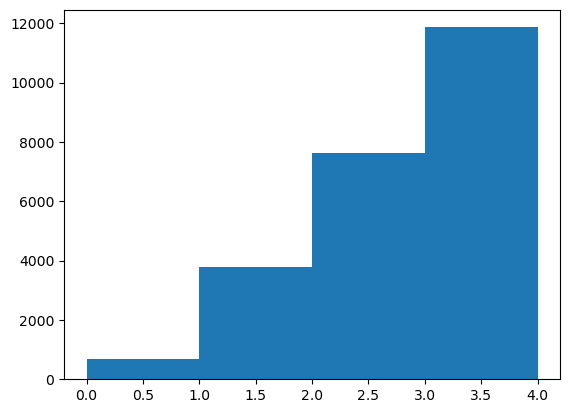

In [189]:
plt.hist(teis_df['age_years'], bins=4)

In [206]:
avg_commscore_over3 = teis_df['Communication Sum of Scaled Scores'].loc[teis_df['age_years']>=3]
avg_commscore_over3.describe()

count    11853.000000
mean        11.186113
std          6.993231
min          2.000000
25%          5.000000
50%         11.000000
75%         16.000000
max         35.000000
Name: Communication Sum of Scaled Scores, dtype: float64

In [205]:
avg_commscore_under3 = teis_df['Communication Sum of Scaled Scores'].loc[teis_df['age_years']<=2]
avg_commscore_under3.describe()

count    12059.000000
mean        14.823037
std          6.100994
min          2.000000
25%         10.000000
50%         15.000000
75%         19.000000
max         38.000000
Name: Communication Sum of Scaled Scores, dtype: float64